In [11]:
import requests
def get_market_data(symbol,tf,limit):
        url = "https://api.binance.com/api/v3/klines"
        params = {
            "symbol": symbol,
            "interval": tf,
            "limit": limit
        }
        try:
            response = requests.get(url, params=params)
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            if e.response is not None:
                print("Response content:", e.response.content)

In [12]:
import pandas as pd
data=get_market_data("BONKUSDT", "1h", 1000)
df = pd.DataFrame(data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_time', 'Quote_asset_volume', 'Number_of_trades', 'Taker_buy_base', 'Taker_buy_quote', 'Ignore'])

07:59:09 - cmdstanpy - INFO - Chain [1] start processing
07:59:11 - cmdstanpy - INFO - Chain [1] done processing


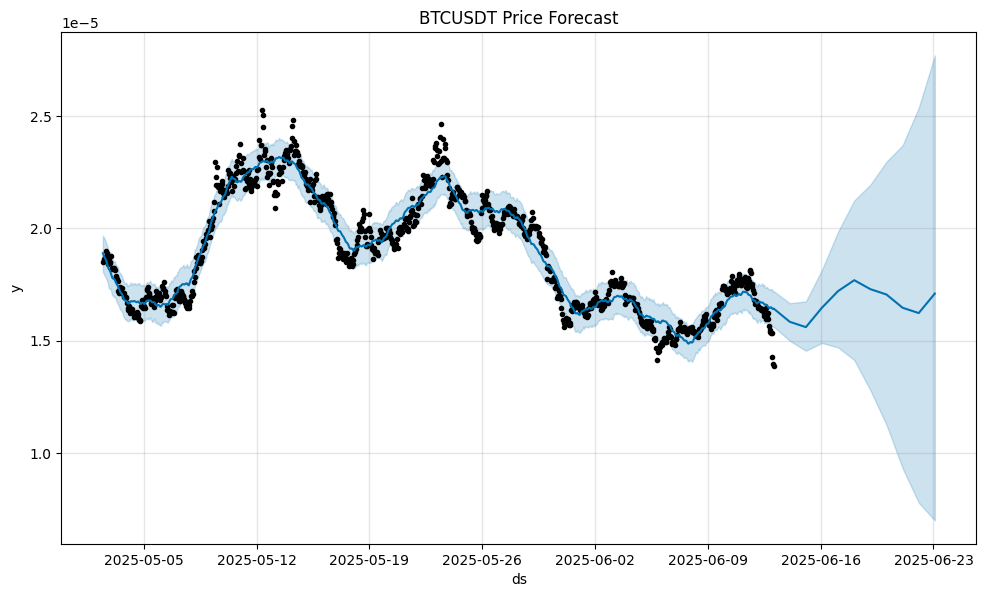

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df['ds'] = pd.to_datetime(df['Timestamp'],unit='ms')
df['y'] = df['Close']                      

df = df[['ds', 'y']]

model = Prophet(daily_seasonality=True)

model.fit(df)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

model.plot(forecast)
plt.title("BTCUSDT Price Forecast")
plt.show()

# model.plot_components(forecast)
# plt.show()

# View forecast table
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))